# EDA — Análisis Exploratorio de Datos
## Datasets: nivel_alumno, nivel_examen, nivel_materia
---

## Sección 0: Setup e Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats

# Configuración general de visualizaciones
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

print('Setup completo.')

Setup completo.


---
## Sección 1: Carga de Datos

In [39]:
alumno  = pd.read_csv('data/nivel_alumno.csv')
materia = pd.read_csv('data/nivel_materia.csv')
examen  = pd.read_csv('data/nivel_examen.csv')

print(f'nivel_alumno  → {alumno.shape[0]:,} filas, {alumno.shape[1]} columnas')
print(f'nivel_materia → {materia.shape[0]:,} filas, {materia.shape[1]} columnas')
print(f'nivel_examen  → {examen.shape[0]:,} filas, {examen.shape[1]} columnas')

nivel_alumno  → 500 filas, 8 columnas
nivel_materia → 1,063 filas, 9 columnas
nivel_examen  → 3,648 filas, 16 columnas


In [40]:
print('--- nivel_alumno ---')
display(alumno.head())

--- nivel_alumno ---


,IdAlumno,FechaNac,Genero,AyudaFinanciera,ColegioTecnico,Fecha,Abandona,AnioIngreso
0,ALU0001,24-01-2000,Masculino,0,0,NaN,0,2020
1,ALU0002,19-02-2004,Masculino,1,0,NaN,0,2024
2,ALU0003,01-10-2005,Masculino,0,0,NaN,0,2024
3,ALU0004,15-04-2001,Masculino,0,1,NaN,0,2023
4,ALU0005,14-12-2003,Masculino,0,0,NaN,0,2021


In [41]:
print('--- nivel_materia ---')
display(materia.head())

--- nivel_materia ---


,IdAlumno,Materia,AnioCursada,FechaNac,AyudaFinanciera,ColegioTecnico,PromedioColegio,Asistencia,Recursa
0,ALU0001,AM1,2020,24-01-2000,0,0,6.90,0.90,0
1,ALU0001,AM2,2021,24-01-2000,0,0,6.90,0.58,1
2,ALU0001,AM2,2022,24-01-2000,0,0,6.90,0.96,1
3,ALU0001,AM2,2023,24-01-2000,0,0,6.90,0.90,0
4,ALU0002,AM1,2024,19-02-2004,1,0,8.07,0.98,0


In [42]:
print('--- nivel_examen ---')
display(examen.head())

--- nivel_examen ---


,IdAlumno,Materia,Anio,TipoExamen,Instancia,Genero,FechaNac,AyudaFinanciera,ColegioTecnico,PromedioColegio,Asistencia,VecesRecursada,ExamenRendido,AusenteExamen,Nota,FechaExamen
0,ALU0001,AM1,2020,Parcial,1,Masculino,24-01-2000,0,0,6.90,0.85,0,1,0,8.60,14-06-2020
1,ALU0001,AM1,2020,Parcial,2,Masculino,24-01-2000,0,0,6.90,0.87,0,1,0,7.89,04-11-2020
2,ALU0001,AM1,2020,Final,1,Masculino,24-01-2000,0,0,6.90,0.90,0,1,0,6.59,09-12-2020
3,ALU0001,AM2,2021,Parcial,1,Masculino,24-01-2000,0,0,6.90,0.66,0,1,0,1.98,13-06-2021
4,ALU0001,AM2,2021,Recuperatorio,1,Masculino,24-01-2000,0,0,6.90,0.60,0,1,0,7.55,24-06-2021


---
## Sección 2: Información General y Estadísticas Descriptivas

In [43]:
for nombre, df in [('nivel_alumno', alumno), ('nivel_materia', materia), ('nivel_examen', examen)]:
    print(f"\n{'='*50}")
    print(f' {nombre}')
    print(f"{'='*50}")
    df.info()
    print(f'\nValores únicos por columna:')
    print(df.nunique())


 nivel_alumno
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IdAlumno         500 non-null    object
 1   FechaNac         500 non-null    object
 2   Genero           500 non-null    object
 3   AyudaFinanciera  500 non-null    int64 
 4   ColegioTecnico   500 non-null    int64 
 5   Fecha            144 non-null    object
 6   Abandona         500 non-null    int64 
 7   AnioIngreso      500 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 31.4+ KB

Valores únicos por columna:
IdAlumno           500
FechaNac           471
Genero               2
AyudaFinanciera      2
ColegioTecnico       2
Fecha              131
Abandona             2
AnioIngreso          5
dtype: int64

 nivel_materia
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 9 columns):
 #   Column           Non-Null C

Algunas observaciones en **nivel_examen**:

- *Nota*: contiene valores nulos
- *IdAlumno*: tiene 440 valores unico, deberia tener 500?

Algunas observaciones en **nivel_materia**:

- *IdAlumno*: tiene 440 valores unico, deberia tener 500?

Algunas observaciones en **nivel_alumno**:

- *Fecha*: contiene 144 valores nulos

In [44]:
print('--- Estadísticas descriptivas: nivel_alumno ---')
display(alumno.describe(include='all').T)

--- Estadísticas descriptivas: nivel_alumno ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IdAlumno,500,500,ALU0500,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaNac,500,471,05-12-2002,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genero,500,2,Masculino,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AyudaFinanciera,500.00,NaN,NaN,NaN,0.03,0.18,0.00,0.00,0.00,0.00,1.00
ColegioTecnico,500.00,NaN,NaN,NaN,0.10,0.30,0.00,0.00,0.00,0.00,1.00
Fecha,144,131,11-05-2023,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandona,500.00,NaN,NaN,NaN,0.29,0.45,0.00,0.00,0.00,1.00,1.00
AnioIngreso,500.00,NaN,NaN,NaN,2022.08,1.43,2020.00,2021.00,2022.00,2023.00,2024.00


In [45]:
print('--- Estadísticas descriptivas: nivel_materia ---')
display(materia.describe(include='all').T)

--- Estadísticas descriptivas: nivel_materia ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IdAlumno,1063,440,ALU0296,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Materia,1063,2,AM1,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnioCursada,1063.00,NaN,NaN,NaN,2022.75,1.47,2020.00,2022.00,2023.00,2024.00,2025.00
FechaNac,1063,418,06-09-2001,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AyudaFinanciera,1063.00,NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
ColegioTecnico,1063.00,NaN,NaN,NaN,0.08,0.27,0.00,0.00,0.00,0.00,1.00
PromedioColegio,1063.00,NaN,NaN,NaN,7.01,0.71,5.30,6.50,6.96,7.50,9.70
Asistencia,1063.00,NaN,NaN,NaN,0.83,0.14,0.10,0.79,0.86,0.93,1.00
Recursa,1063.00,NaN,NaN,NaN,0.47,0.50,0.00,0.00,0.00,1.00,1.00


In [46]:
print('--- Estadísticas descriptivas: nivel_examen ---')
display(examen.describe(include='all').T)

--- Estadísticas descriptivas: nivel_examen ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IdAlumno,3648,440,ALU0048,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Materia,3648,2,AM1,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anio,3648.00,NaN,NaN,NaN,2022.73,1.47,2020.00,2022.00,2023.00,2024.00,2025.00
TipoExamen,3648,3,Parcial,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instancia,3648.00,NaN,NaN,NaN,1.42,0.54,1.00,1.00,1.00,2.00,3.00
Genero,3648,2,Masculino,3279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FechaNac,3648,418,09-11-2002,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AyudaFinanciera,3648.00,NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
ColegioTecnico,3648.00,NaN,NaN,NaN,0.07,0.26,0.00,0.00,0.00,0.00,1.00
PromedioColegio,3648.00,NaN,NaN,NaN,7.01,0.71,5.30,6.51,6.96,7.52,9.70


---
## Sección 3: Análisis de Valores Nulos

In [47]:
def tabla_nulos(df, nombre):
    nulos = df.isnull().sum()
    porcentaje = (nulos / len(df) * 100).round(2)
    tabla = pd.DataFrame({'Nulos': nulos, '% Nulos': porcentaje})
    tabla = tabla[tabla['Nulos'] > 0].sort_values('% Nulos', ascending=False)
    if tabla.empty:
        print(f'{nombre}: sin valores nulos.')
    else:
        print(f'{nombre}:')
        display(tabla)
    return tabla

_ = tabla_nulos(alumno, 'nivel_alumno')
_ = tabla_nulos(materia, 'nivel_materia')
_ = tabla_nulos(examen, 'nivel_examen')

nivel_alumno:


,Nulos,% Nulos
Fecha,356,71.20


nivel_materia: sin valores nulos.
nivel_examen:


,Nulos,% Nulos
Nota,109,2.99


In [48]:
# Verificar que en nivel_alumno la columna 'Fecha' solo tiene valores cuando Abandona=1
print('Fecha no nula cuando Abandona=0:', alumno[alumno['Abandona'] == 0]['Fecha'].notna().sum())
print('Fecha no nula cuando Abandona=1:', alumno[alumno['Abandona'] == 1]['Fecha'].notna().sum())
print('Fecha nula cuando Abandona=1:', alumno[alumno['Abandona'] == 1]['Fecha'].isna().sum())

Fecha no nula cuando Abandona=0: 0
Fecha no nula cuando Abandona=1: 144
Fecha nula cuando Abandona=1: 0


En nivel_alumno:
En Fecha los valores nulos estan vacias ya que el alumno no abandona  (fecha abandono).

En nivel_examen:
Los alumnos que no tienen nota son aquellos que no fueron a rendir el examen.

---
## Sección 4: EDA — nivel_alumno.csv

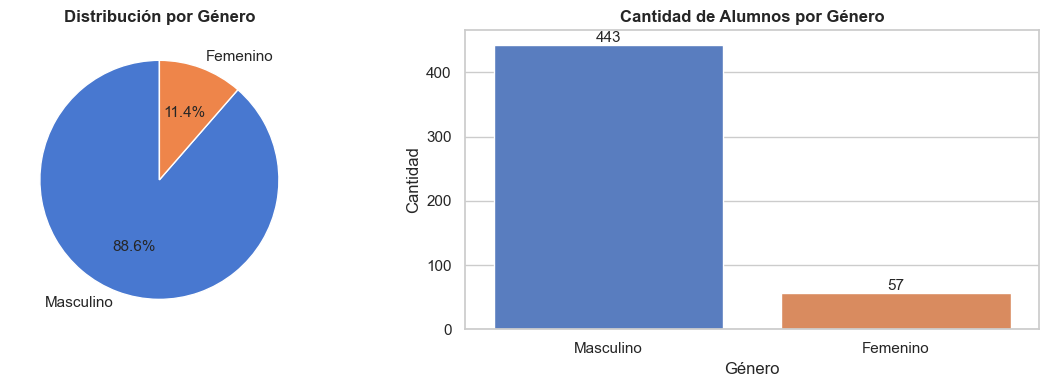

In [49]:
# Distribución por Género
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

genero_counts = alumno['Genero'].value_counts()
axes[0].pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('muted', len(genero_counts)))
axes[0].set_title('Distribución por Género', fontweight='bold')

sns.countplot(data=alumno, x='Genero', hue='Genero', legend=False, ax=axes[1], palette='muted')
axes[1].set_title('Cantidad de Alumnos por Género', fontweight='bold')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Cantidad')
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se visualiza una gran cantidad de alumnos masculinos (~88%) que de alumnos femeninos (~12%) 

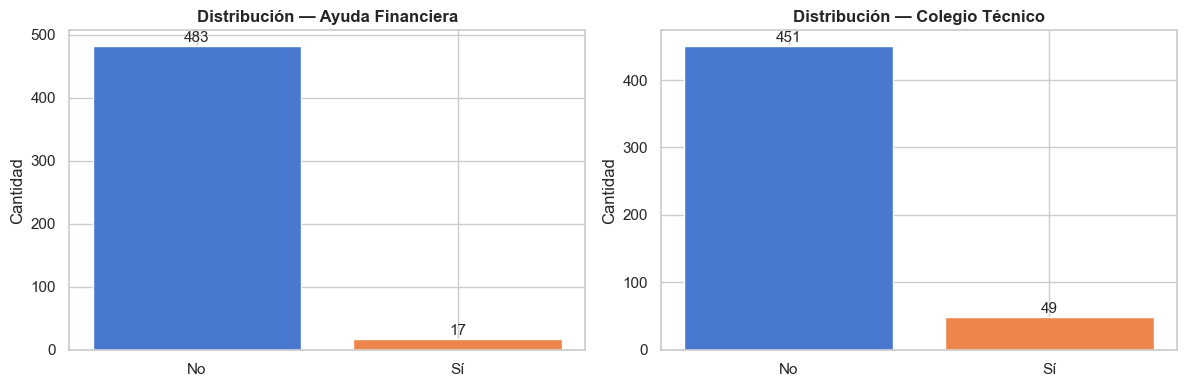

In [50]:
# Distribución por AyudaFinanciera y ColegioTecnico
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col, titulo in zip(axes,
                            ['AyudaFinanciera', 'ColegioTecnico'],
                            ['Ayuda Financiera', 'Colegio Técnico']):
    counts = alumno[col].value_counts().sort_index()
    labels = ['No', 'Sí']
    ax.bar(labels, counts.values, color=sns.color_palette('muted', 2))
    ax.set_title(f'Distribución — {titulo}', fontweight='bold')
    ax.set_ylabel('Cantidad')
    for i, v in enumerate(counts.values):
        ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Ayuda Financiera:**

- 3,4% de los alumnos tienen ayuda financiera
- 96,6% de los alumnos NO tiene ayuda financiera

**Colegio técnico:**

- 9.8% de los alumnos fue a un colegio técnico
- 90.2% de los alumnos fue a un colegio técnico

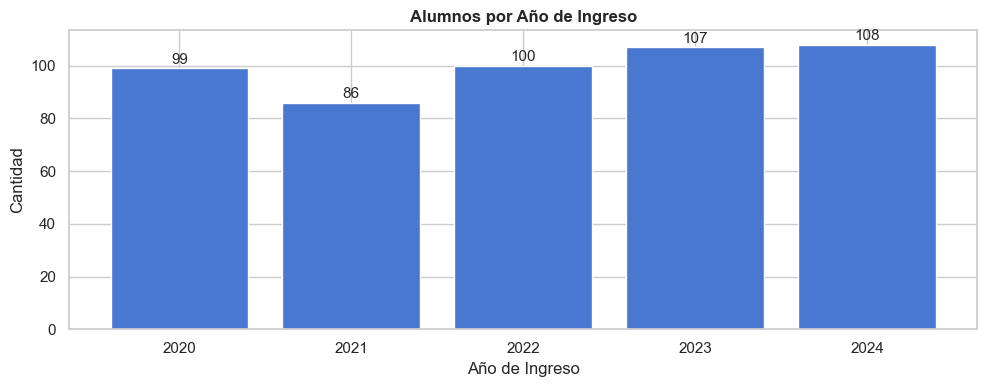

In [51]:
# Distribución por Año de Ingreso
fig, ax = plt.subplots(figsize=(10, 4))
anio_counts = alumno['AnioIngreso'].value_counts().sort_index()
ax.bar(anio_counts.index.astype(str), anio_counts.values, color=sns.color_palette('muted')[0])
ax.set_title('Alumnos por Año de Ingreso', fontweight='bold')
ax.set_xlabel('Año de Ingreso')
ax.set_ylabel('Cantidad')
for i, v in enumerate(anio_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Se visualiza que en promedio ingresan 100 alumnos por año. Aun que se puede visualizar tambien que el año con mayor cantidad de ingresos de alumnos fueron en el 2024 (108 alumnos) con un 1,6% más. Mientras que el año con menos ingresos de alumnos fue el 2021 (86 alumnos) con un 1,4% menos.

Total alumnos: 500
Abandonaron:   144 (28.8%)
No abandonaron:356 (71.2%)


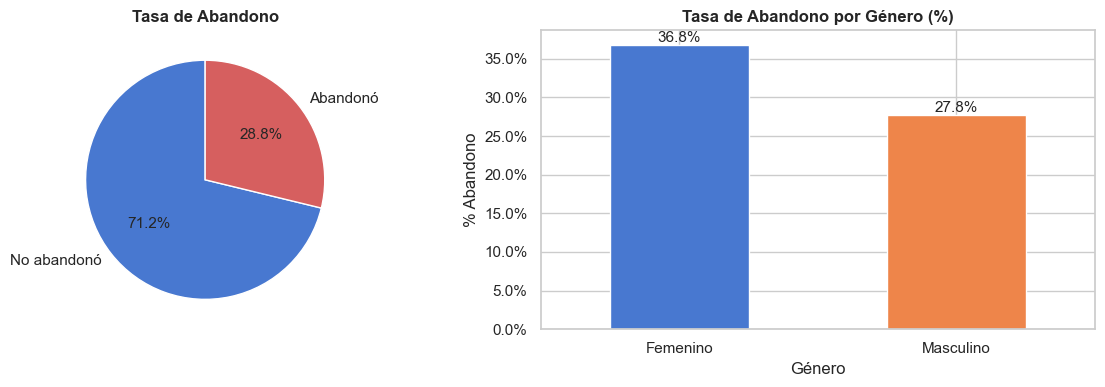

In [52]:
# Tasa de abandono
total = len(alumno)
abandonaron = alumno['Abandona'].sum()
print(f'Total alumnos: {total}')
print(f'Abandonaron:   {abandonaron} ({abandonaron/total*100:.1f}%)')
print(f'No abandonaron:{total - abandonaron} ({(total-abandonaron)/total*100:.1f}%)')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

labels = ['No abandonó', 'Abandonó']
values = [total - abandonaron, abandonaron]
axes[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=[sns.color_palette('muted')[0], sns.color_palette('muted')[3]])
axes[0].set_title('Tasa de Abandono', fontweight='bold')

# Tasa de abandono por género
abandono_genero = alumno.groupby('Genero')['Abandona'].mean() * 100
abandono_genero.plot(kind='bar', ax=axes[1], color=sns.color_palette('muted', len(abandono_genero)), rot=0)
axes[1].set_title('Tasa de Abandono por Género (%)', fontweight='bold')
axes[1].set_ylabel('% Abandono')
axes[1].set_xlabel('Género')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se visualiza que la tasa de abandono en este caso es de ~29% aproximadamente.

La tasa de abandono del género femenino es de un 9% mas que la tasa de abandono del genero masculo

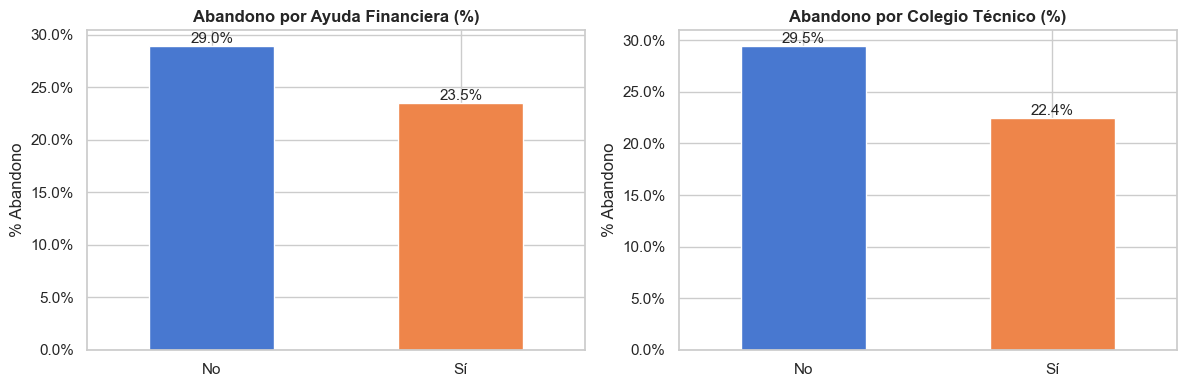

In [53]:
# Abandono por AyudaFinanciera y ColegioTecnico
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, col, titulo in zip(axes,
                            ['AyudaFinanciera', 'ColegioTecnico'],
                            ['Ayuda Financiera', 'Colegio Técnico']):
    tasa = alumno.groupby(col)['Abandona'].mean() * 100
    labels_map = {0: 'No', 1: 'Sí'}
    tasa.index = [labels_map[i] for i in tasa.index]
    tasa.plot(kind='bar', ax=ax, color=sns.color_palette('muted', 2), rot=0)
    ax.set_title(f'Abandono por {titulo} (%)', fontweight='bold')
    ax.set_ylabel('% Abandono')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Abandonos por Ayuda Financiera:** Se visualiza que aquellos alumnos que no tienen ayuda financiera abandona un 29% mientras que los que tienen ayuda financiera abandona un 23,5%.

**Abandonos por colegio técnico:** Se visualiza que aquellos alumnos que no fueron a un colegio técnico abandona un 29% mientras que los que fueron a un colegio técnico abandona un 22,4%.

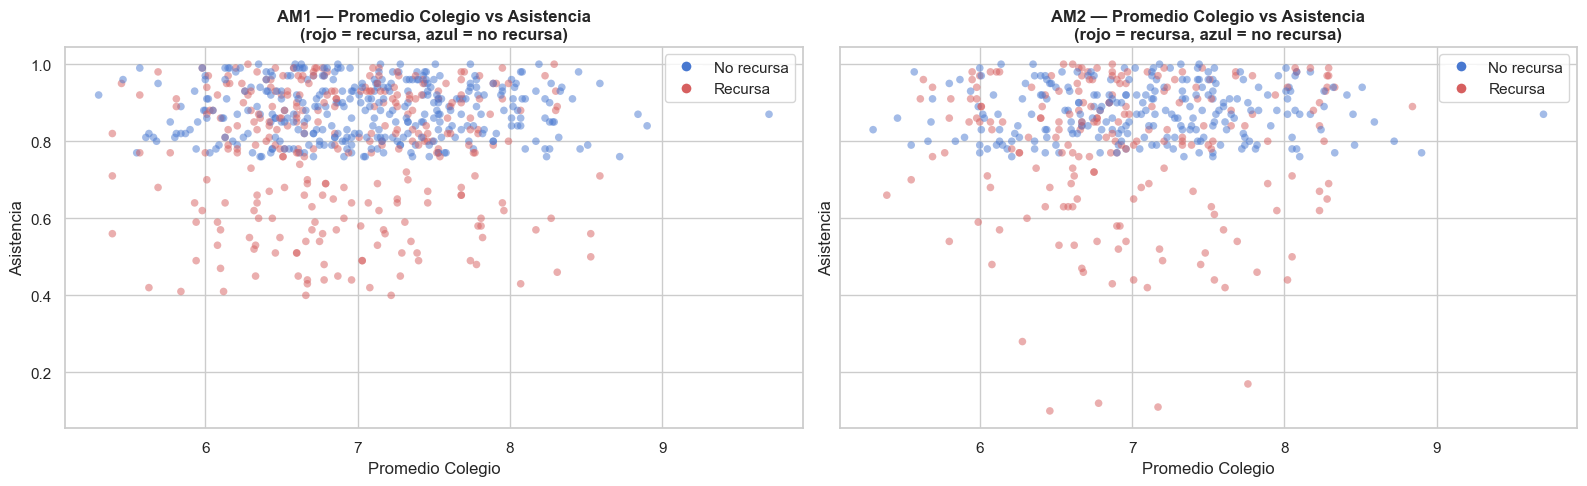

[AM1] Correlación PromedioColegio vs Asistencia: r=0.052, p=0.1900
[AM2] Correlación PromedioColegio vs Asistencia: r=0.026, p=0.5928


In [54]:
# PromedioColegio vs Asistencia — AM1 vs AM2
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('muted')[0],
           label='No recursa', markersize=8),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('muted')[3],
           label='Recursa', markersize=8)
]

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True, sharex=True)

for ax, mat in zip(axes, ['AM1', 'AM2']):
    subset = materia[materia['Materia'] == mat]
    colors = subset['Recursa'].map({0: sns.color_palette('muted')[0], 1: sns.color_palette('muted')[3]})

    ax.scatter(subset['PromedioColegio'], subset['Asistencia'],
               c=colors, alpha=0.5, edgecolors='none', s=30)
    ax.set_title(f'{mat} — Promedio Colegio vs Asistencia\n(rojo = recursa, azul = no recursa)', fontweight='bold')
    ax.set_xlabel('Promedio Colegio')
    ax.set_ylabel('Asistencia')
    ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

for mat in ['AM1', 'AM2']:
    subset = materia[materia['Materia'] == mat]
    corr, pval = stats.pearsonr(subset['PromedioColegio'], subset['Asistencia'])
    print(f'[{mat}] Correlación PromedioColegio vs Asistencia: r={corr:.3f}, p={pval:.4f}')

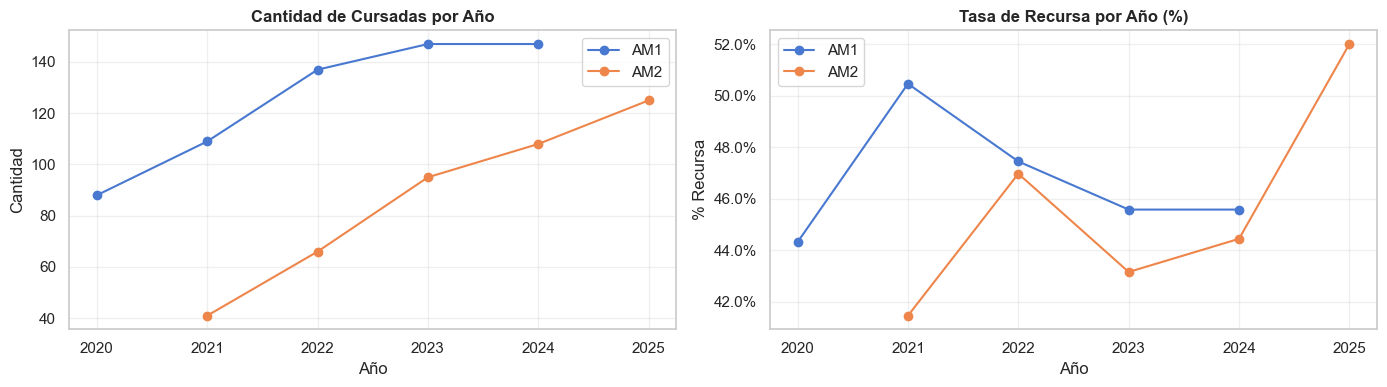

In [55]:
# Evolución de cursadas por año — AM1 vs AM2
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

colors_mat = {'AM1': sns.color_palette('muted')[0], 'AM2': sns.color_palette('muted')[1]}

for mat in ['AM1', 'AM2']:
    subset = materia[materia['Materia'] == mat]

    cursadas_anio = subset.groupby('AnioCursada').size()
    axes[0].plot(cursadas_anio.index, cursadas_anio.values, marker='o',
                 color=colors_mat[mat], label=mat)

    recursa_anio = subset.groupby('AnioCursada')['Recursa'].mean() * 100
    axes[1].plot(recursa_anio.index, recursa_anio.values, marker='o',
                 color=colors_mat[mat], label=mat)

axes[0].set_title('Cantidad de Cursadas por Año', fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Tasa de Recursa por Año (%)', fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('% Recursa')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Diccionario**:

r = mide que tan relacionadas linealmente estan las dos variables (-1 a 1)
- r=0 -> sin relacion
- r=1 -> fuerte relacion positiva
- r=-1 -> fuerte relacion negativa

p-value = responde a "¿esta correlacion ocurrio por azar o es real?"
- p < 0.05 → la relación es estadísticamente significativa (poco probable que sea azar)
- p ≥ 0.05 → no podés descartar que sea azar
Se visualiza una correlacion casi nula en ambas materias.

Materia	p-value	Interpretación

    - AM1	0.19	19% de probabilidad de que la correlación sea puro azar. No es significativa.

    - AM2	0.59	59% de probabilidad de que sea azar. Definitivamente no es significativa.

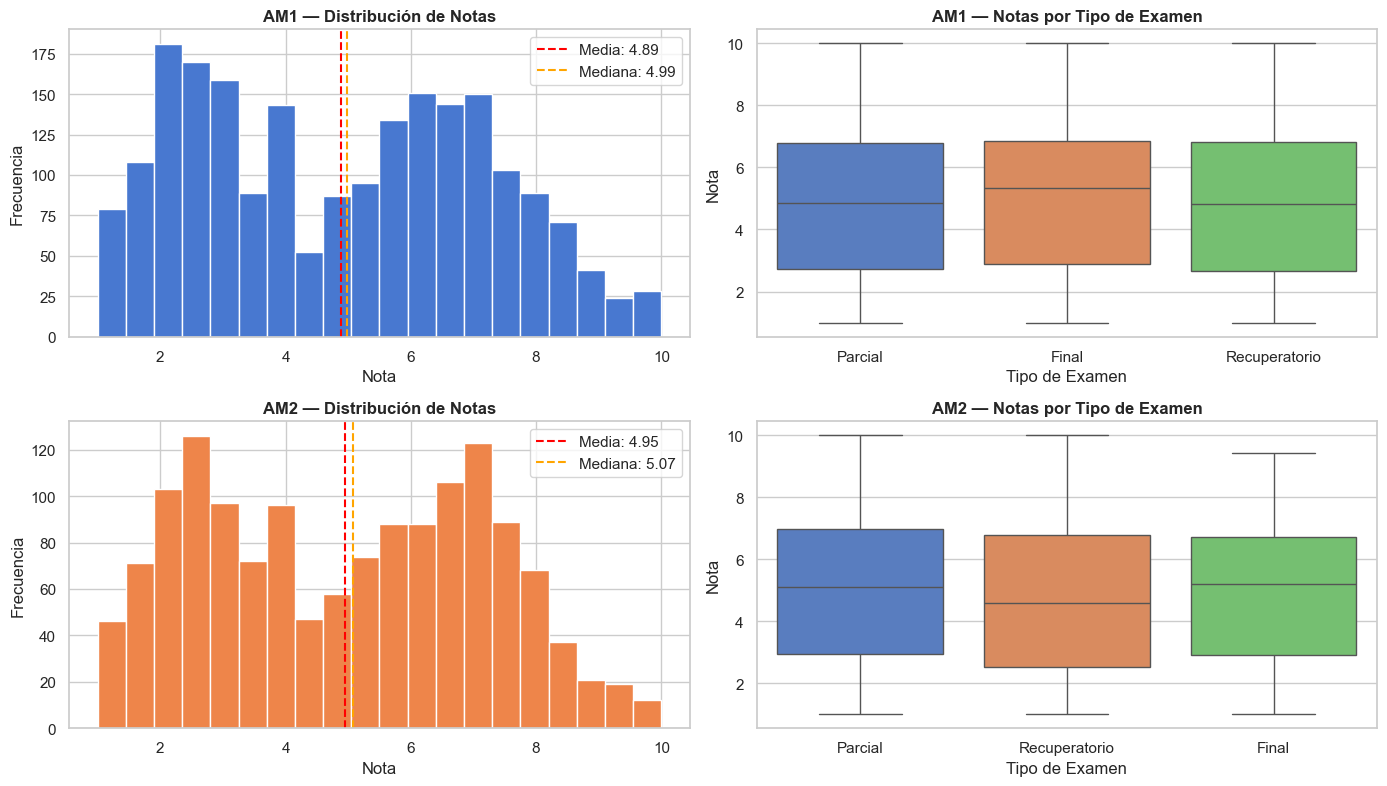

Estadísticas de Nota por Materia:
          count  mean  std  min  25%  50%  75%   max
Materia                                             
AM1     2098.00  4.89 2.31 1.00 2.76 4.99 6.80 10.00
AM2     1441.00  4.95 2.25 1.00 2.86 5.07 6.89 10.00


In [56]:
# Distribución de Notas — AM1 vs AM2
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for row, mat in enumerate(['AM1', 'AM2']):
    notas_mat = examen[(examen['Nota'].notna()) & (examen['Materia'] == mat)]['Nota']
    examen_mat = examen[(examen['Nota'].notna()) & (examen['Materia'] == mat)]

    # Histograma
    axes[row, 0].hist(notas_mat, bins=20, color=sns.color_palette('muted')[row], edgecolor='white')
    axes[row, 0].set_title(f'{mat} — Distribución de Notas', fontweight='bold')
    axes[row, 0].set_xlabel('Nota')
    axes[row, 0].set_ylabel('Frecuencia')
    axes[row, 0].axvline(notas_mat.mean(), color='red', linestyle='--', label=f"Media: {notas_mat.mean():.2f}")
    axes[row, 0].axvline(notas_mat.median(), color='orange', linestyle='--', label=f"Mediana: {notas_mat.median():.2f}")
    axes[row, 0].legend()

    # Boxplot por TipoExamen
    sns.boxplot(data=examen_mat, x='TipoExamen', y='Nota', hue='TipoExamen',
                legend=False, ax=axes[row, 1], palette='muted')
    axes[row, 1].set_title(f'{mat} — Notas por Tipo de Examen', fontweight='bold')
    axes[row, 1].set_xlabel('Tipo de Examen')
    axes[row, 1].set_ylabel('Nota')

plt.tight_layout()
plt.show()

print('Estadísticas de Nota por Materia:')
print(examen[examen['Nota'].notna()].groupby('Materia')['Nota'].describe())

---
## Sección 5: EDA — nivel_materia.csv

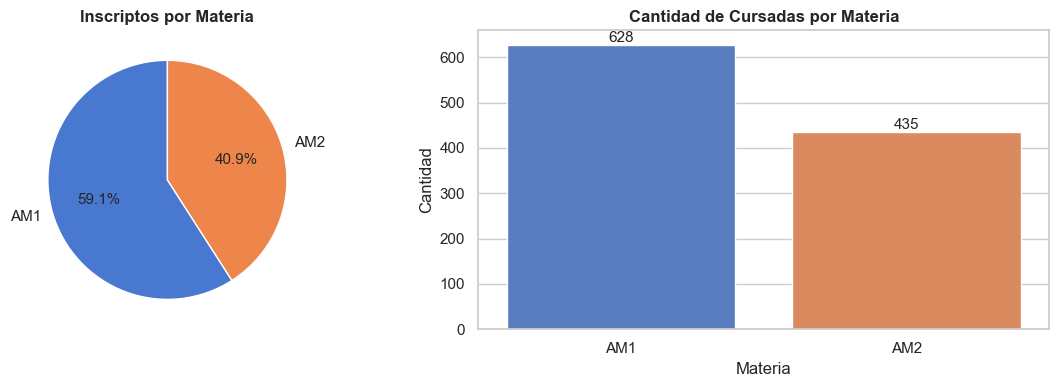

In [57]:
# Distribución por Materia
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

mat_counts = materia['Materia'].value_counts()
axes[0].pie(mat_counts, labels=mat_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('muted', len(mat_counts)))
axes[0].set_title('Inscriptos por Materia', fontweight='bold')

sns.countplot(data=materia, x='Materia', hue='Materia', legend=False, ax=axes[1], palette='muted')
axes[1].set_title('Cantidad de Cursadas por Materia', fontweight='bold')
axes[1].set_xlabel('Materia')
axes[1].set_ylabel('Cantidad')
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se visualiza que:
- AM1 → 59.1%
- AM2 → 40.9%

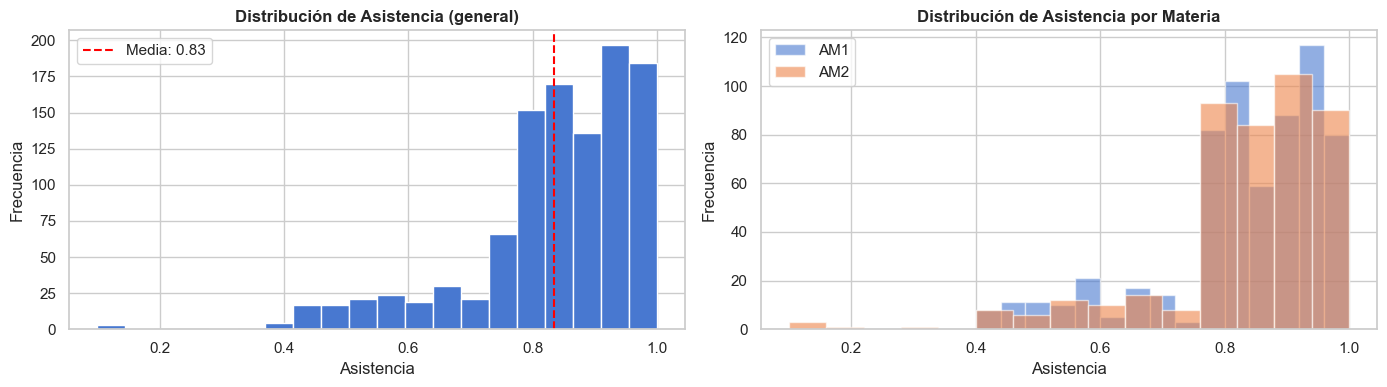

Estadísticas de Asistencia:
         count  mean  std  min  25%  50%  75%  max
Materia                                           
AM1     628.00  0.83 0.13 0.40 0.78 0.86 0.93 1.00
AM2     435.00  0.84 0.14 0.10 0.79 0.86 0.93 1.00


In [58]:
# Distribución de Asistencia
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(materia['Asistencia'], bins=20, color=sns.color_palette('muted')[0], edgecolor='white')
axes[0].set_title('Distribución de Asistencia (general)', fontweight='bold')
axes[0].set_xlabel('Asistencia')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(materia['Asistencia'].mean(), color='red', linestyle='--', label=f"Media: {materia['Asistencia'].mean():.2f}")
axes[0].legend()

for materia_nombre in materia['Materia'].unique():
    subset = materia[materia['Materia'] == materia_nombre]['Asistencia']
    axes[1].hist(subset, bins=15, alpha=0.6, label=materia_nombre, edgecolor='white')
axes[1].set_title('Distribución de Asistencia por Materia', fontweight='bold')
axes[1].set_xlabel('Asistencia')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()

print('Estadísticas de Asistencia:')
print(materia.groupby('Materia')['Asistencia'].describe())

Se visualiza que las assitencias son muy similares entre ambas materias

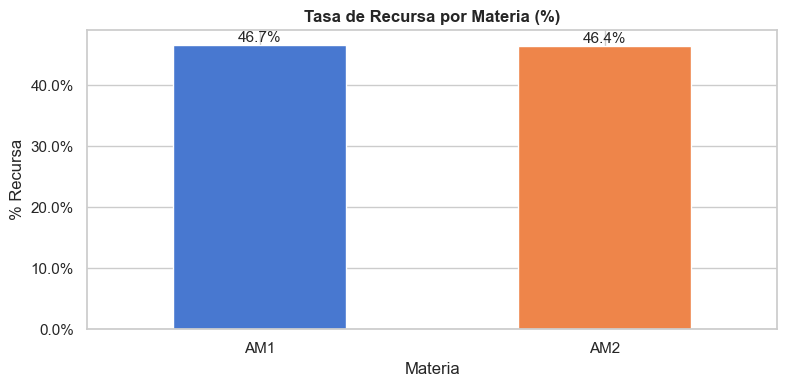

In [59]:
# Tasa de Recursa por Materia
recursa_materia = materia.groupby('Materia')['Recursa'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 4))
recursa_materia.plot(kind='bar', ax=ax, color=sns.color_palette('muted', len(recursa_materia)), rot=0)
ax.set_title('Tasa de Recursa por Materia (%)', fontweight='bold')
ax.set_ylabel('% Recursa')
ax.set_xlabel('Materia')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

La tasa de recursada por materia es casi igual entre AM1 y AM2 con un ~46,5% de probabilidad.

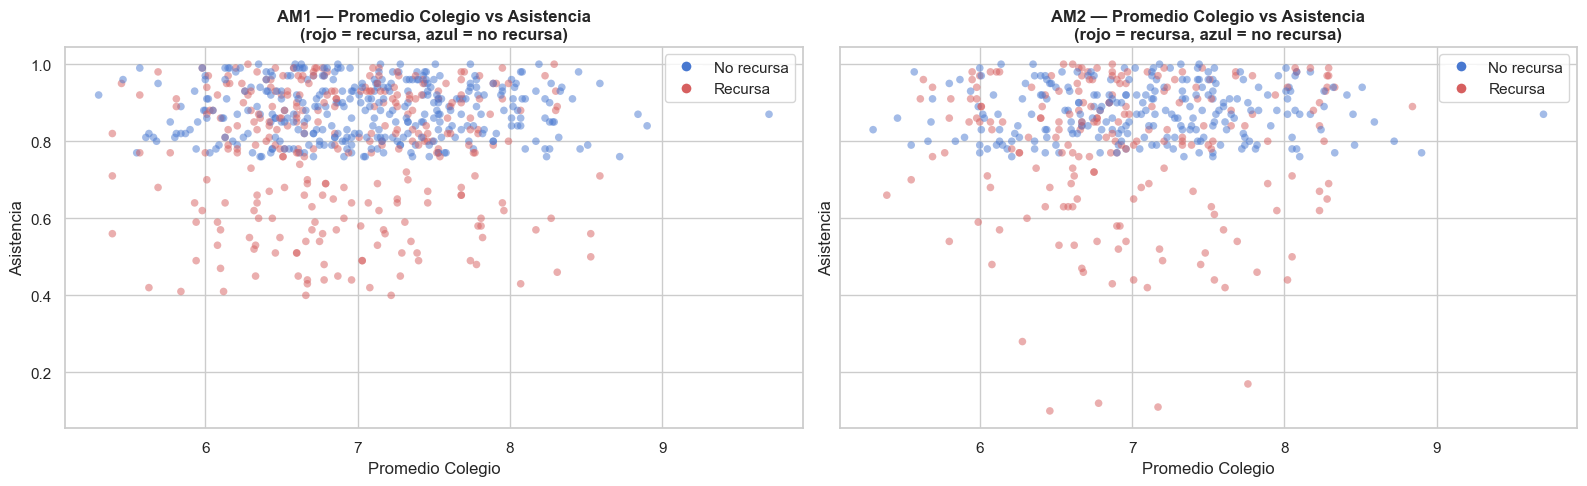

[AM1] Correlación PromedioColegio vs Asistencia: r=0.052, p=0.1900
[AM2] Correlación PromedioColegio vs Asistencia: r=0.026, p=0.5928


In [60]:
# PromedioColegio vs Asistencia
# PromedioColegio vs Asistencia — AM1 vs AM2
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('muted')[0],
           label='No recursa', markersize=8),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('muted')[3],
           label='Recursa', markersize=8)
]

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True, sharex=True)

for ax, mat in zip(axes, ['AM1', 'AM2']):
    subset = materia[materia['Materia'] == mat]
    colors = subset['Recursa'].map({0: sns.color_palette('muted')[0], 1: sns.color_palette('muted')[3]})

    ax.scatter(subset['PromedioColegio'], subset['Asistencia'],
               c=colors, alpha=0.5, edgecolors='none', s=30)
    ax.set_title(f'{mat} — Promedio Colegio vs Asistencia\n(rojo = recursa, azul = no recursa)', fontweight='bold')
    ax.set_xlabel('Promedio Colegio')
    ax.set_ylabel('Asistencia')
    ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

for mat in ['AM1', 'AM2']:
    subset = materia[materia['Materia'] == mat]
    corr, pval = stats.pearsonr(subset['PromedioColegio'], subset['Asistencia'])
    print(f'[{mat}] Correlación PromedioColegio vs Asistencia: r={corr:.3f}, p={pval:.4f}')

Tener en cuenta que para no recursar la materia se necesita minimo un 75% de asistencia a clases. No parece influir el desempeño academico que tuvo el alumno en el colegio sobre la recursada de la materia AM1 Y AM2.

In [ ]:
# Correlación nivel_alumno
num_cols_alumno = ['AyudaFinanciera', 'ColegioTecnico', 'Abandona', 'AnioIngreso']
corr_alumno = alumno[num_cols_alumno].corr()

fig, ax = plt.subplots(figsize=(7, 5))
mask = np.triu(np.ones_like(corr_alumno, dtype=bool))
sns.heatmap(corr_alumno, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title('Correlación — nivel_alumno', fontweight='bold')
plt.tight_layout()
plt.show()

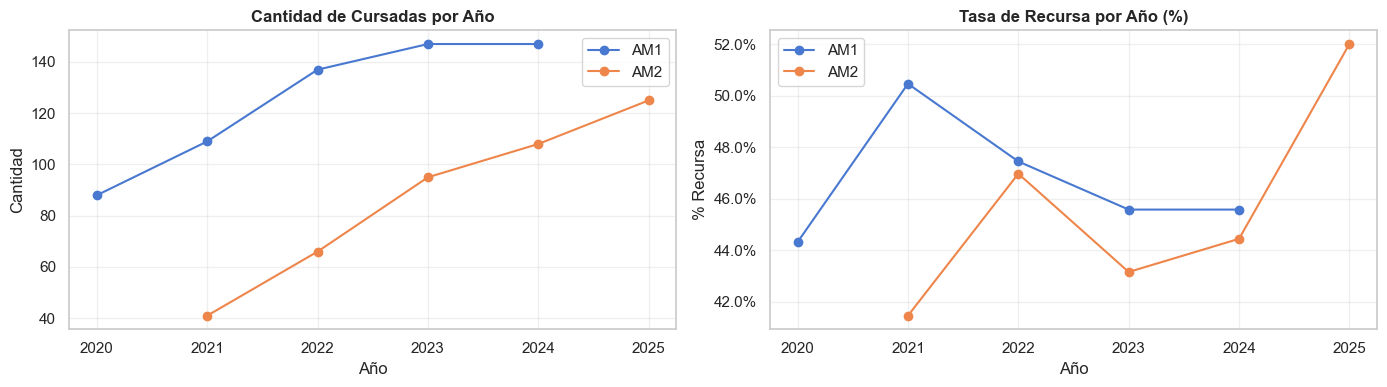

In [61]:
# Evolución de cursadas por año — AM1 vs AM2
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

colors_mat = {'AM1': sns.color_palette('muted')[0], 'AM2': sns.color_palette('muted')[1]}

for mat in ['AM1', 'AM2']:
    subset = materia[materia['Materia'] == mat]

    cursadas_anio = subset.groupby('AnioCursada').size()
    axes[0].plot(cursadas_anio.index, cursadas_anio.values, marker='o',
                 color=colors_mat[mat], label=mat)

    recursa_anio = subset.groupby('AnioCursada')['Recursa'].mean() * 100
    axes[1].plot(recursa_anio.index, recursa_anio.values, marker='o',
                 color=colors_mat[mat], label=mat)

axes[0].set_title('Cantidad de Cursadas por Año', fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Tasa de Recursa por Año (%)', fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('% Recursa')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Cantidad de Cursadas por Año**

- AM1: Crece fuerte de 2020 a 2023. Se estabiliza en 2023–2024. No aparece 2025 (coherente con tu estructura). Indica mayor volumen en primeros años y luego estabilización.

- AM2: Crecimiento sostenido desde 2021 hasta 2025. Tendencia claramente ascendente.

**Tasa de Recursa por Año**
- AM1: Pico en 2021 (~50%). Luego baja y se estabiliza en ~45–46%. Tendencia ligeramente descendente post 2021. Posible “año crítico” en 2021.

- AM2: Más volátil. Fuerte aumento en 2025 (~52%). 2021 fue relativamente bajo (~41%). 2025 parece un año problemático para AM2.

---
## Sección 6: EDA — nivel_examen.csv

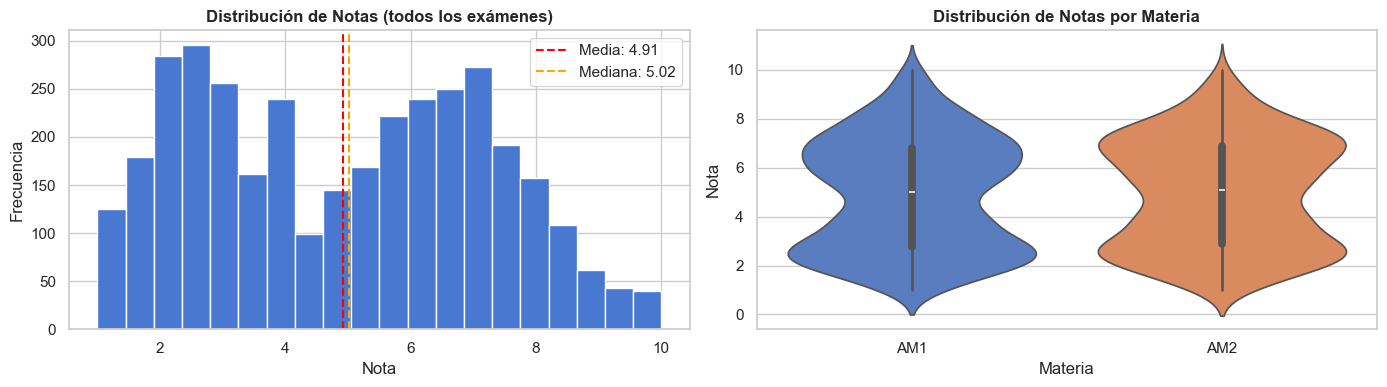

Estadísticas de Nota (general):
count   3539.00
mean       4.91
std        2.28
min        1.00
25%        2.80
50%        5.02
75%        6.84
max       10.00
Name: Nota, dtype: float64


In [62]:
# Distribución de Notas (general)
notas_validas = examen[examen['Nota'].notna()]['Nota']

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(notas_validas, bins=20, color=sns.color_palette('muted')[0], edgecolor='white')
axes[0].set_title('Distribución de Notas (todos los exámenes)', fontweight='bold')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(notas_validas.mean(), color='red', linestyle='--', label=f"Media: {notas_validas.mean():.2f}")
axes[0].axvline(notas_validas.median(), color='orange', linestyle='--', label=f"Mediana: {notas_validas.median():.2f}")
axes[0].legend()

sns.violinplot(data=examen[examen['Nota'].notna()], x='Materia', y='Nota', hue='Materia', legend=False, ax=axes[1], palette='muted')
axes[1].set_title('Distribución de Notas por Materia', fontweight='bold')
axes[1].set_xlabel('Materia')
axes[1].set_ylabel('Nota')


plt.tight_layout()
plt.show()

print('Estadísticas de Nota (general):')
print(notas_validas.describe())

**Gráfico izquierdo — Histograma general**

La distribución es claramente *bimodal*, con dos concentraciones bien diferenciadas:

- Primer pico en notas 2–3: es el más alto de todo el histograma, con casi 300 exámenes en la barra de nota 3. Representa la masa de alumnos que desaprueban.
- Valle pronunciado en nota 4–5: hay una caída abrupta justo en el umbral de aprobación, lo que sugiere que existe un corte institucional duro en 4. Las notas no se distribuyen libremente, sino que están partidas en dos grupos con lógicas propias.
- Segundo pico en notas 6–7: representa a los alumnos que aprueban, con mayor concentración entre 6 y 7, y una caída progresiva hacia el 10.


**Gráfico derecho — Violin plot por materia**

El violin plot agrega valor respecto a un boxplot porque muestra la forma real de la distribución, no solo los percentiles.

Ambas materias (AM1 y AM2) muestran una forma muy característica:

- Dos "panzas" bien marcadas, una en la zona de notas bajas (≈2–3) y otra en la zona de notas medias-altas (≈6–7), confirmando visualmente la bimodalidad observada en el histograma.
- Estrangulamiento en nota 4, que es donde la densidad cae al mínimo. Esto es la huella visual del corte de aprobación.
- Mediana ≈ 5 en ambas materias.
- Los bigotes internos llegan hasta los extremos del rango (1 a 10), sin valores atípicos.
- AM2 tiene una panza inferior levemente más ancha que AM1, indicando una mayor densidad de notas muy bajas (1–2) en esa materia, lo que podría señalar que AM2 es percibida como más difícil o que llegan a ella alumnos con trayectorias más complejas.

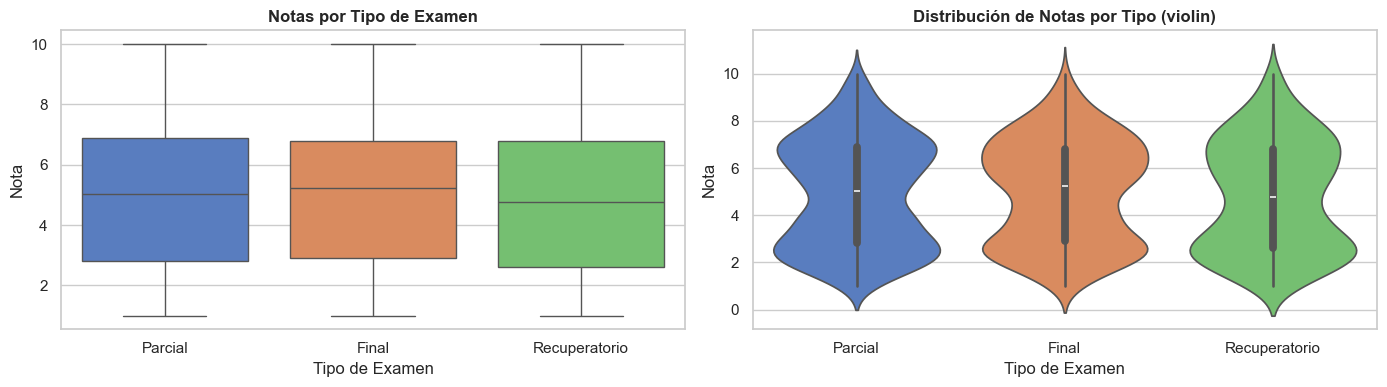

Notas promedio por TipoExamen:
                count  mean  std  min  25%  50%  75%   max
TipoExamen                                                
Final          908.00  4.99 2.20 1.00 2.90 5.24 6.79 10.00
Parcial       1904.00  4.93 2.29 1.00 2.81 5.02 6.88 10.00
Recuperatorio  727.00  4.79 2.35 1.00 2.62 4.78 6.79 10.00


In [63]:
# Notas por TipoExamen
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

examen_con_nota = examen[examen['Nota'].notna()]

sns.boxplot(data=examen_con_nota, x='TipoExamen', y='Nota', hue='TipoExamen', legend=False, ax=axes[0], palette='muted')
axes[0].set_title('Notas por Tipo de Examen', fontweight='bold')
axes[0].set_xlabel('Tipo de Examen')
axes[0].set_ylabel('Nota')

sns.violinplot(data=examen_con_nota, x='TipoExamen', y='Nota', hue='TipoExamen', legend=False, ax=axes[1], palette='muted', inner='box')
axes[1].set_title('Distribución de Notas por Tipo (violin)', fontweight='bold')
axes[1].set_xlabel('Tipo de Examen')
axes[1].set_ylabel('Nota')

plt.tight_layout()
plt.show()

print('Notas promedio por TipoExamen:')
print(examen_con_nota.groupby('TipoExamen')['Nota'].describe())

**Gráfico izquierdo — Boxplot por tipo de examen**
Los tres tipos de examen muestran estadísticas descriptivas muy similares entre sí:

- Mediana ≈ 5 en los tres casos, con Parcial y Final prácticamente idénticos y Recuperatorio levemente por debajo (~4.8).
- IQR (caja): Parcial y Final tienen cajas similares (Q1 ≈ 3, Q3 ≈ 6.5–7). El Recuperatorio tiene una caja levemente más comprimida hacia abajo (Q1 más bajo, ≈ 2.5), sugiriendo mayor concentración de notas bajas.
- Bigotes llegan hasta los extremos del rango en los tres tipos, sin outliers visibles.

**Gráfico derecho — Violin plot por tipo de examen**

Aquí es donde emergen las diferencias reales entre los tres tipos:

*Parcial*:

- Forma bimodal clara con dos panzas bien definidas: una en notas 2–3 y otra en 6–7.
- El estrangulamiento en nota 4 es visible pero no tan pronunciado como en los otros tipos.
- La panza superior (aprobados) es la más ancha de los tres, indicando que los parciales tienen la mayor proporción de notas altas. Tiene sentido: es el primer filtro y muchos alumnos llegan preparados.

*Final*:

- También bimodal, con estructura similar al parcial.
- La panza inferior (notas bajas) es más pronunciada que en el parcial, lo que indica que una porción relevante de alumnos que llega al final llega con dificultades acumuladas.
- La panza superior es algo más estrecha que en los parciales, mostrando menor concentración de notas muy altas.

*Recuperatorio*:

- Es el violin más asimétrico de los tres. La panza inferior (notas 1–3) es notablemente más ancha y dominante respecto a la superior.
- La panza de aprobados (6–7) existe pero es claramente más pequeña que en los otros dos tipos.
- Esto es completamente coherente con la lógica del sistema: el recuperatorio solo lo rinden alumnos que ya desaprobaron el examen anterior, por lo que el perfil de rendimiento está sesgado hacia notas bajas.

Total instancias de examen: 3648
Instancias con ausencia:    109 (3.0%)


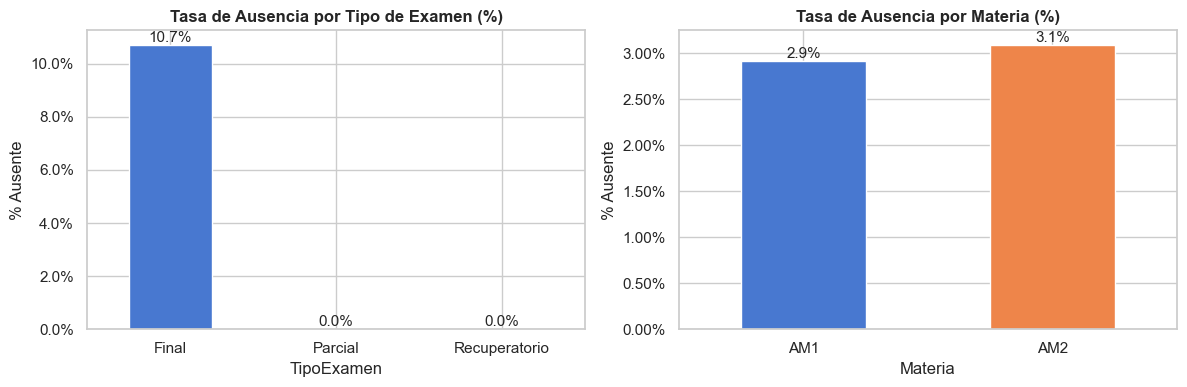

In [64]:
# Tasa de Ausencias
total_examenes = len(examen)
ausentes = examen['AusenteExamen'].sum()
print(f'Total instancias de examen: {total_examenes}')
print(f'Instancias con ausencia:    {ausentes} ({ausentes/total_examenes*100:.1f}%)')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Ausencias por tipo
ausentes_tipo = examen.groupby('TipoExamen')['AusenteExamen'].mean() * 100
ausentes_tipo.plot(kind='bar', ax=axes[0], color=sns.color_palette('muted', len(ausentes_tipo)), rot=0)
axes[0].set_title('Tasa de Ausencia por Tipo de Examen (%)', fontweight='bold')
axes[0].set_ylabel('% Ausente')
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

# Ausencias por materia
ausentes_materia = examen.groupby('Materia')['AusenteExamen'].mean() * 100
ausentes_materia.plot(kind='bar', ax=axes[1], color=sns.color_palette('muted', len(ausentes_materia)), rot=0)
axes[1].set_title('Tasa de Ausencia por Materia (%)', fontweight='bold')
axes[1].set_ylabel('% Ausente')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Final: 10.7% de ausencia. Es el único tipo de examen con ausentes.
- Parcial y Recuperatorio: 0.0% de ausencia en ambos casos.

Se observan algunas ausencias en los examenes finales y se toma la decision de eliminar aquellos examenes que tuvieron alumnos ausentes

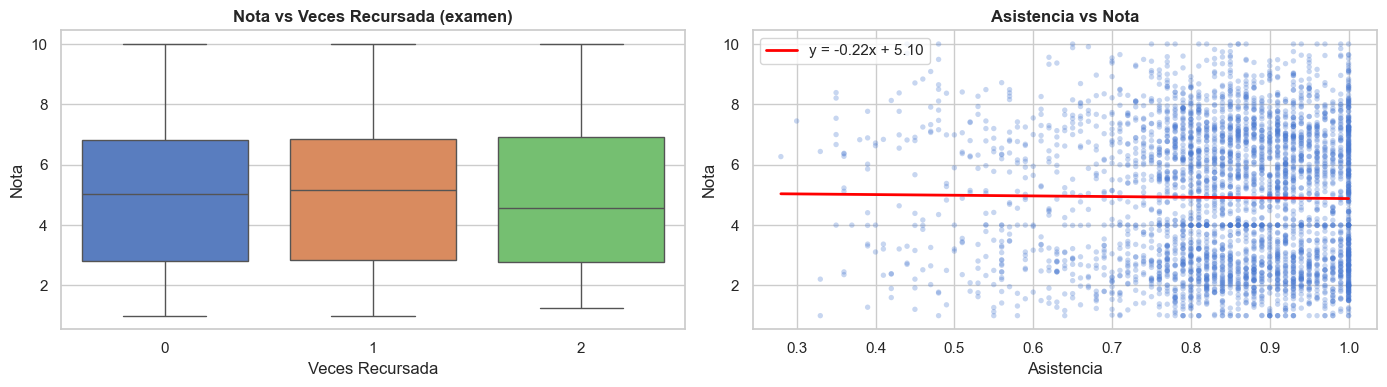

Correlación Asistencia vs Nota: r=-0.013, p=0.4557


In [65]:
# VecesRecursada vs Nota
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(data=examen_con_nota, x='VecesRecursada', y='Nota', hue='VecesRecursada', legend=False, ax=axes[0], palette='muted')
axes[0].set_title('Nota vs Veces Recursada (examen)', fontweight='bold')
axes[0].set_xlabel('Veces Recursada')
axes[0].set_ylabel('Nota')

# Asistencia vs Nota (scatter)
axes[1].scatter(examen_con_nota['Asistencia'], examen_con_nota['Nota'],
                alpha=0.3, color=sns.color_palette('muted')[0], s=15, edgecolors='none')
# Línea de regresión
m, b = np.polyfit(examen_con_nota['Asistencia'], examen_con_nota['Nota'], 1)
x_line = np.linspace(examen_con_nota['Asistencia'].min(), examen_con_nota['Asistencia'].max(), 100)
axes[1].plot(x_line, m * x_line + b, color='red', linewidth=2, label=f'y = {m:.2f}x + {b:.2f}')
axes[1].set_title('Asistencia vs Nota', fontweight='bold')
axes[1].set_xlabel('Asistencia')
axes[1].set_ylabel('Nota')
axes[1].legend()

plt.tight_layout()
plt.show()

corr, pval = stats.pearsonr(examen_con_nota['Asistencia'], examen_con_nota['Nota'])
print(f'Correlación Asistencia vs Nota: r={corr:.3f}, p={pval:.4f}')

**Gráfico izquierdo — Nota vs Veces Recursada**

Los tres grupos (0, 1 y 2 recursadas) muestran distribuciones muy similares, pero con una tendencia sutil y relevante:

- *VecesRecursada = 0:* mediana ≈ 5.2, caja entre 3 y 6.7. Es el grupo con la distribución más equilibrada entre notas bajas y altas.
- *VecesRecursada = 1:* mediana ≈ 5.2, caja casi idéntica al grupo 0. A simple vista parecen iguales.
- *VecesRecursada = 2:* mediana levemente más baja ≈ 4.8, con el Q1 cayendo más hacia notas bajas (≈ 2.5) y el Q3 similar. La caja se desplaza levemente hacia abajo respecto a los otros dos grupos.

La tendencia general es que a mayor cantidad de recursadas, las notas tienden a ser marginalmente más bajas, pero la diferencia es pequeña. Esto podría parecer contradictorio: ¿no deberían mejorar las notas al recursar?


**Gráfico derecho — Asistencia vs Nota**
- *Patrón de concentración vertical*: la gran mayoría de los puntos se agrupan en asistencias altas (0.75–1.0). Esto es esperable: la mayoría de los alumnos tiene buena asistencia. La densidad de puntos en asistencias bajas (0.3–0.6) es notablemente menor.

- *Columna vertical en asistencia* ≈ 1.0: hay una concentración muy marcada de exámenes con asistencia perfecta o casi perfecta (0.95–1.0), con notas distribuidas en todo el rango. Esto indica que la asistencia máxima no garantiza buenas notas, lo que es realista.

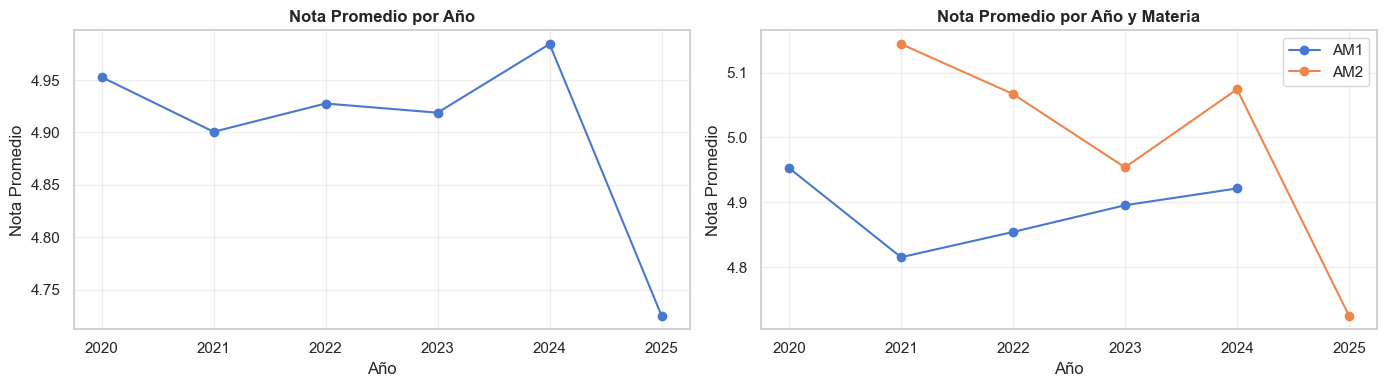

In [66]:
# Evolución de notas por año
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

nota_anio = examen_con_nota.groupby('Anio')['Nota'].mean()
axes[0].plot(nota_anio.index, nota_anio.values, marker='o', color=sns.color_palette('muted')[0])
axes[0].set_title('Nota Promedio por Año', fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Nota Promedio')
axes[0].grid(True, alpha=0.3)

for materia_nombre in examen_con_nota['Materia'].unique():
    subset = examen_con_nota[examen_con_nota['Materia'] == materia_nombre]
    nota_mat_anio = subset.groupby('Anio')['Nota'].mean()
    axes[1].plot(nota_mat_anio.index, nota_mat_anio.values, marker='o', label=materia_nombre)
axes[1].set_title('Nota Promedio por Año y Materia', fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Nota Promedio')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Gráfico izquierdo — Nota Promedio general por Año**

La evolución temporal muestra un comportamiento con dos fases bien distintas:

- *Fase estable (2020–2024)*: la nota promedio oscila en un rango muy estrecho entre 4.90 y 4.98, prácticamente sin variación significativa.

- *Quiebre abrupto en 2025*: la nota promedio cae a ~4.73, el valor más bajo de toda la serie. Esta caída no representa un deterioro real del rendimiento académico sino un efecto de composición: en 2025 solo existen exámenes de AM2, y dentro de AM2 en ese año hay una proporción alta de alumnos que llegaron ahí precisamente porque tuvieron dificultades previas (recursadas, finales pendientes). Es la cohorte más "filtrada" hacia el bajo rendimiento.

---
## Sección 7: Transformaciones para visualizaciones

Variables binarias (Genero, Materia) → Label Encoding
- Masculino → 1 / Femenino → 0
- AM1 → 0 / AM2 → 1

Variables con más de 2 categorías (TipoExamen) → Categorica se crea una columna binaria por cada categoria 

- Parcial → 1 / 0 
- Recuperatorio → 1 / 0 
- Final → 1 / 0 

Variables de fecha (FechaNac) → Extracción de Edad

- FechaNac → Edad en años (a partir de AnioIngreso o fecha actual)

In [77]:
# Transformaciones para matrices de correlación
anio_ref = 2024

# ── nivel_alumno ──────────────────────────────────────────
alumno_corr = alumno.copy()
alumno_corr['Genero_num'] = alumno_corr['Genero'].map({'Masculino': 1, 'Femenino': 0})
alumno_corr['Edad']       = anio_ref - pd.to_datetime(
                                alumno_corr['FechaNac'], dayfirst=True).dt.year

num_cols_alumno = ['Genero_num', 'Edad', 'AyudaFinanciera',
                   'ColegioTecnico', 'AnioIngreso', 'Abandona']

# ── nivel_materia ─────────────────────────────────────────
materia_corr = materia.copy()
materia_corr['Materia_num'] = materia_corr['Materia'].map({'AM1': 0, 'AM2': 1})
materia_corr['Edad']        = anio_ref - pd.to_datetime(
                                  materia_corr['FechaNac'], dayfirst=True).dt.year

num_cols_materia = ['Materia_num', 'Edad', 'AyudaFinanciera', 'ColegioTecnico',
                    'PromedioColegio', 'Asistencia', 'Recursa']

# ── nivel_examen ──────────────────────────────────────────
examen_corr = examen_con_nota.copy()
examen_corr['Materia_num'] = examen_corr['Materia'].map({'AM1': 0, 'AM2': 1})
examen_corr['Genero_num']  = examen_corr['Genero'].map({'Masculino': 1, 'Femenino': 0})
examen_corr['Edad']        = anio_ref - pd.to_datetime(
                                 examen_corr['FechaNac'], dayfirst=True).dt.year

# One-Hot Encoding para TipoExamen (nominal, sin orden)
tipo_dummies = pd.get_dummies(examen_corr['TipoExamen'], prefix='TipoExamen')
examen_corr  = pd.concat([examen_corr, tipo_dummies], axis=1)

num_cols_examen = ['Materia_num', 'Genero_num', 'Edad', 'Instancia',
                   'TipoExamen_Final', 'TipoExamen_Parcial', 'TipoExamen_Recuperatorio',
                   'AyudaFinanciera', 'ColegioTecnico', 'PromedioColegio',
                   'Asistencia', 'VecesRecursada', 'Nota']

print('Transformaciones aplicadas:')
print(f'  nivel_alumno  → {len(num_cols_alumno)} variables numéricas')
print(f'  nivel_materia → {len(num_cols_materia)} variables numéricas')
print(f'  nivel_examen  → {len(num_cols_examen)} variables numéricas')

Transformaciones aplicadas:
  nivel_alumno  → 6 variables numéricas
  nivel_materia → 7 variables numéricas
  nivel_examen  → 13 variables numéricas


---
## Sección 8: Matrices de Correlación

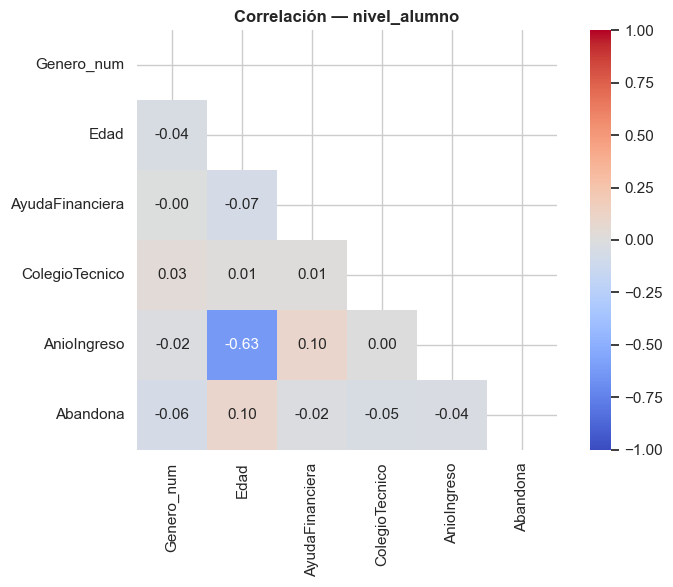

In [74]:
# Correlación nivel_alumno
corr_alumno = alumno_corr[num_cols_alumno].corr()

fig, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_alumno, dtype=bool))
sns.heatmap(corr_alumno, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title('Correlación — nivel_alumno', fontweight='bold')
plt.tight_layout()
plt.show()

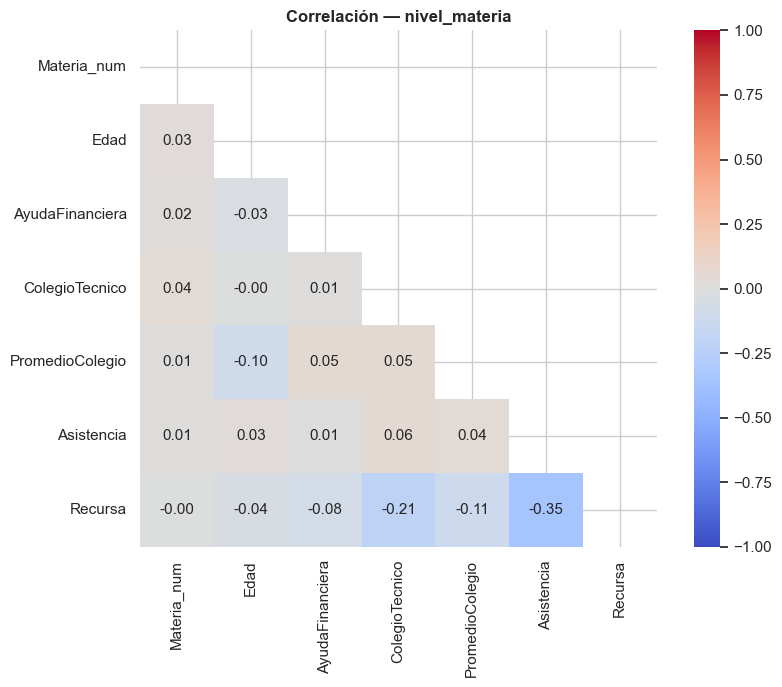

In [75]:
# Correlación nivel_materia
corr_materia = materia_corr[num_cols_materia].corr()

fig, ax = plt.subplots(figsize=(9, 7))
mask = np.triu(np.ones_like(corr_materia, dtype=bool))
sns.heatmap(corr_materia, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title('Correlación — nivel_materia', fontweight='bold')
plt.tight_layout()
plt.show()

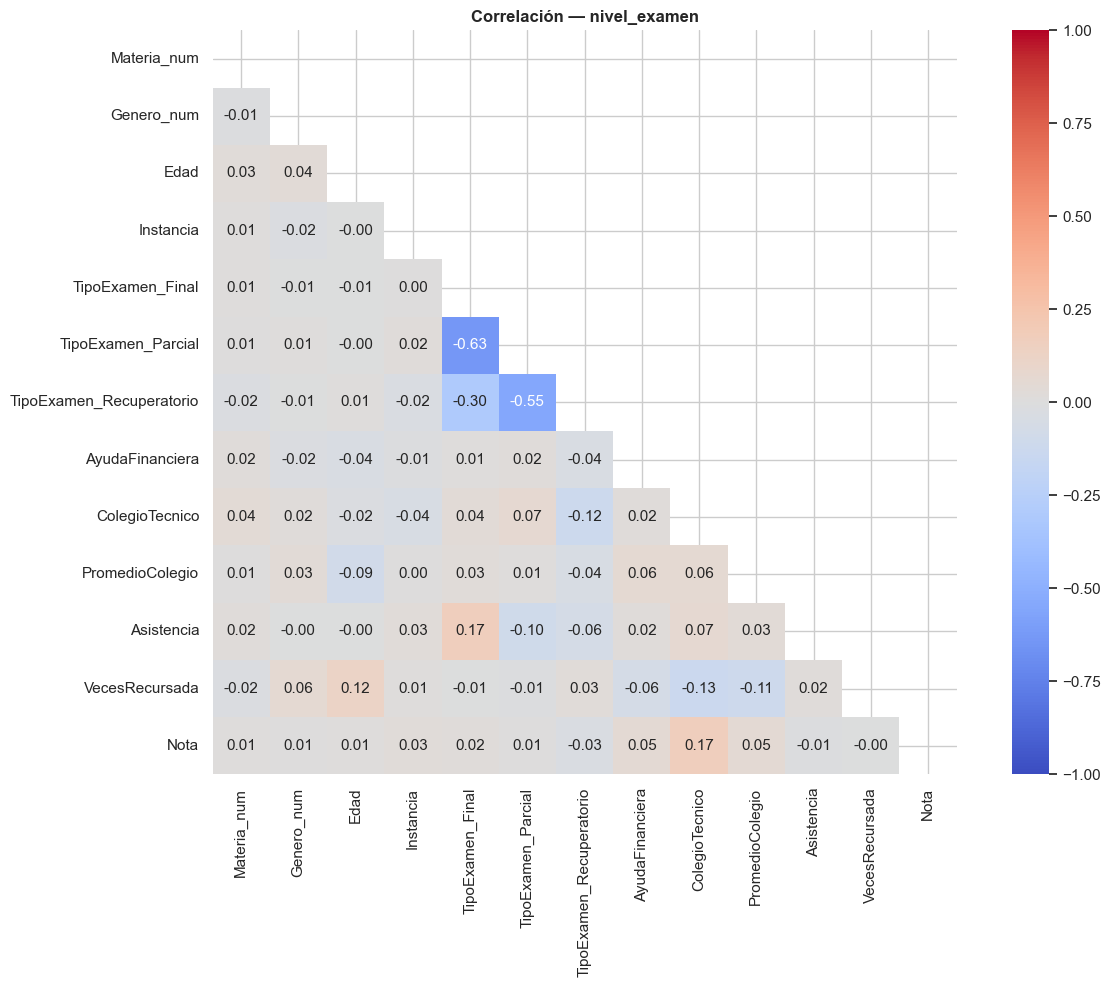

In [78]:
# Correlación nivel_examen
corr_examen = examen_corr[num_cols_examen].corr()

fig, ax = plt.subplots(figsize=(13, 10))
mask = np.triu(np.ones_like(corr_examen, dtype=bool))
sns.heatmap(corr_examen, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title('Correlación — nivel_examen', fontweight='bold')
plt.tight_layout()
plt.show()

---
## Sección 9: Conclusiones e Insights Clave

In [ ]:
print('='*60)
print(' RESUMEN DEL EDA')
print('='*60)

print(f"""
DATOS GENERALES
---------------
- {alumno.shape[0]} alumnos únicos en nivel_alumno
- {materia.shape[0]} registros de cursadas en nivel_materia
- {examen.shape[0]} instancias de examen en nivel_examen (teniendo en cuenta AusenteExamen=1)
- Materias analizadas: {', '.join(examen['Materia'].unique())}
- Rango de años: {examen['Anio'].min()} - {examen['Anio'].max()}

PERFIL DEL ALUMNO (nivel_alumno)
--------------------------------
- Género predominante: {alumno['Genero'].value_counts().idxmax()} ({alumno['Genero'].value_counts().iloc[0]/len(alumno)*100:.1f}%)
- Alumnos con ayuda financiera: {alumno['AyudaFinanciera'].mean()*100:.1f}%
- Alumnos de colegio técnico: {alumno['ColegioTecnico'].mean()*100:.1f}%
- Tasa de abandono: {alumno['Abandona'].mean()*100:.1f}%

RENDIMIENTO EN CURSADA (nivel_materia)
--------------------------------------
- Asistencia promedio: {materia['Asistencia'].mean():.2f} ({materia['Asistencia'].mean()*100:.1f}%)
- Tasa de recursa: {materia['Recursa'].mean()*100:.1f}%
- Promedio colegio promedio: {materia['PromedioColegio'].mean():.2f}

RENDIMIENTO EN EXÁMENES (nivel_examen)
--------------------------------------
- Nota promedio (exámenes rendidos): {notas_validas.mean():.2f}
- Mediana de nota: {notas_validas.median():.2f}
- Tasa de ausencias: {examen['AusenteExamen'].mean()*100:.1f}%
- Nota promedio Parcial:       {examen_con_nota[examen_con_nota['TipoExamen']=='Parcial']['Nota'].mean():.2f}
- Nota promedio Recuperatorio: {examen_con_nota[examen_con_nota['TipoExamen']=='Recuperatorio']['Nota'].mean():.2f}
- Nota promedio Final:         {examen_con_nota[examen_con_nota['TipoExamen']=='Final']['Nota'].mean():.2f}
""")

print('='*60)
print(' VARIABLES CANDIDATAS PARA MODELOS PREDICTIVOS')
print('='*60)
print("""
Target posibles:
  - Nota (regresión) o Aprobado (clasificación)
  - Recursa (clasificación)
  - Abandona (clasificación)

Features relevantes identificadas:
  - Asistencia (correlación positiva con Nota)
  - TipoExamen (impacta en la distribución de notas)
  - VecesRecursada (indicador de dificultad del alumno)
  - PromedioColegio (antecedente académico)
  - Materia (AM1 vs AM2 muestran diferencias)
  - Género, AyudaFinanciera, ColegioTecnico (variables demográficas)
  - AnioIngreso / Anio (cohorte del alumno)
""")

 RESUMEN DEL EDA

DATOS GENERALES
---------------
- 500 alumnos únicos en nivel_alumno
- 1063 registros de cursadas en nivel_materia
- 3648 instancias de examen en nivel_examen
- Materias analizadas: AM1, AM2
- Rango de años: 2020 - 2025

PERFIL DEL ALUMNO (nivel_alumno)
--------------------------------
- Género predominante: Masculino (88.6%)
- Alumnos con ayuda financiera: 3.4%
- Alumnos de colegio técnico: 9.8%
- Tasa de abandono: 28.8%

RENDIMIENTO EN CURSADA (nivel_materia)
--------------------------------------
- Asistencia promedio: 0.83 (83.4%)
- Tasa de recursa: 46.6%
- Promedio colegio promedio: 7.01

RENDIMIENTO EN EXÁMENES (nivel_examen)
--------------------------------------
- Nota promedio (exámenes rendidos): 4.91
- Mediana de nota: 5.02
- Tasa de ausencias: 3.0%
- Nota promedio Parcial:       4.93
- Nota promedio Recuperatorio: 4.79
- Nota promedio Final:         4.99

 VARIABLES CANDIDATAS PARA MODELOS PREDICTIVOS

Target posibles:
  - Nota (regresión) o Aprobado (clas